In [8]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [9]:
df = pd.read_csv('spotify_songs.csv')

In [10]:
#filter data and preprocess data
y = df['playlist_genre']
df.drop(['track_popularity','track_album_id', 'playlist_id','track_id', 'track_name', 'track_album_name', 'playlist_subgenre','track_artist', 'playlist_genre','track_album_release_date','playlist_name'], axis=1, inplace=True)
# df.drop(['track_popularity','energy','track_album_id', 'playlist_id','track_id', 'track_name', 'track_album_name', 'playlist_subgenre','track_artist', 'playlist_genre','track_album_release_date','playlist_name'], axis=1, inplace=True)
# df.drop(['track_popularity','track_album_id', 'playlist_id','track_id', 'track_name', 'track_album_name', 'playlist_subgenre','track_artist', 'playlist_genre','track_album_release_date','playlist_name','duration_ms'], axis=1, inplace=True)
x = df
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Remove 'track_popularity','track_album_id', 'playlist_id','track_id', 'track_name', 'track_album_name', 'playlist_subgenre','track_artist', 'playlist_genre','track_album_release_date','playlist_name'
Ouput = playlist_genre (pop, rap, rock, latin, r&b, edm)

In [11]:
#split data into training, testing, and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
# from sklearn.decomposition import PCA
 
# pca = PCA(n_components = 12)
 
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# loadings = pca.components_
# print(loadings)
# # print(X_train)
 
# explained_variance = pca.explained_variance_ratio_

[[-2.41167932e-07  3.20001002e-08  8.62012112e-07 -5.83350447e-06
   1.37591151e-07 -1.60432607e-07 -2.85692145e-07  2.59866241e-07
   1.51318414e-08 -1.40956755e-07 -6.25257178e-07  1.00000000e+00]
 [-1.02699282e-03  1.00628214e-03 -1.31333591e-03  9.91993499e-03
   2.13521696e-04  1.56151889e-04 -9.34226847e-04  2.42354240e-04
   1.31448753e-04 -2.44082228e-04  9.99948361e-01  6.83574507e-07]
 [ 4.40168935e-04  1.29958082e-03  9.99523679e-01  1.82813141e-02
  -2.47469809e-02  6.39060145e-04 -5.64060323e-04 -6.13880893e-05
   2.48979263e-04  1.35356474e-03  1.13553363e-03 -7.50633498e-07]
 [-1.60538738e-03 -4.12487314e-02  1.84024102e-02 -9.98467108e-01
   3.01056655e-03  1.20873216e-04  2.74927839e-02  1.10577032e-02
  -3.92057660e-03 -4.28404701e-03  9.99108504e-03 -5.82920407e-06]
 [ 1.68347145e-02 -3.37275685e-03 -2.46925549e-02 -3.27594911e-03
  -9.99428827e-01  1.36356961e-02  3.88878863e-04  5.37493053e-03
   1.69039079e-03 -2.98324684e-03  2.30143348e-04  1.44455260e-07]
 [-2.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

tree = DecisionTreeClassifier(random_state=42)
# small_tree = DecisionTreeClassifier(max_depth = 8,random_state=42)
small_tree = DecisionTreeClassifier(max_depth =5,random_state=42)

tree.fit(X_train, y_train)
small_tree.fit(X_train, y_train)


tree_graph_to_png(tree=tree, feature_names=["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms"], png_file_to_save='spotify_tree.png')
tree_graph_to_png(tree = small_tree,feature_names=["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms"], png_file_to_save='small_spotify_tree.png')

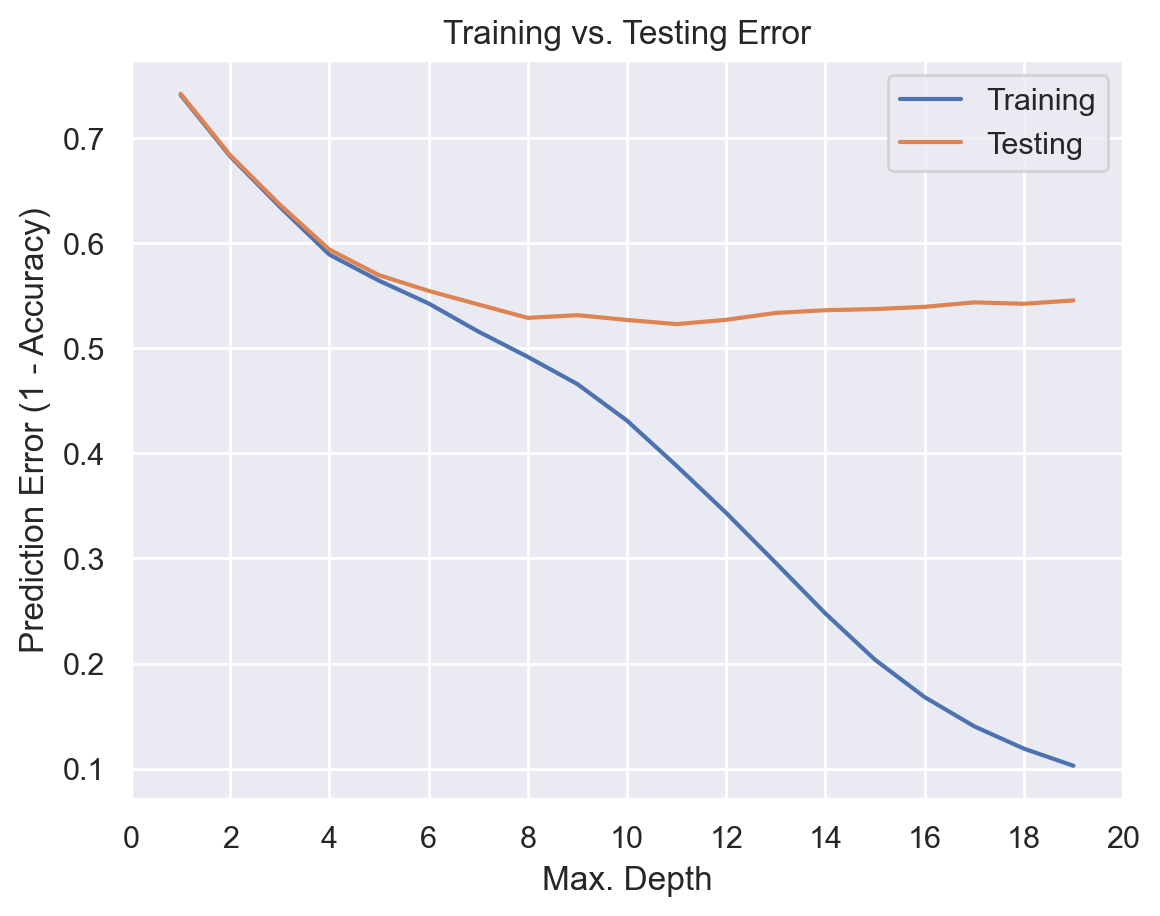

In [53]:
#references: https://www.geeksforgeeks.org/how-decision-tree-depth-impact-on-the-accuracy/ 
def max_depth_error(max_depths):
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)
    model.fit(X_train, y_train)
    training_error = 1 - model.score(X_train, y_train)
    testing_error = 1 - model.score(X_test, y_test)
    return {"Max Depth": max_depths, "Training error": training_error, "Testing Error": testing_error}


max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])
max_depth_Df

plt.figure()
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training error'])
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Testing Error'])
plt.title('Training vs. Testing Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Testing'])


In [54]:
from sklearn.metrics import accuracy_score
tree_pred = tree.predict(X_test)
small_tree_pred_train = small_tree.predict(X_train) #check if overfit
small_tree_pred_test = small_tree.predict(X_test)
tree_pred_train = tree.predict(X_train)

small_tree_pred = small_tree.predict(X_test)
print (f" Accuracy for training decision tree is {accuracy_score(y_train, tree_pred_train)}") 
print (f" Accuracy for training small decision tree is {accuracy_score(y_train, small_tree_pred_train)}") 

print (f" Accuracy for decision tree is {accuracy_score(y_test, tree_pred)}") 
print (f" Accuracy for small decision tree is {accuracy_score(y_test, small_tree_pred_test)}") 



 Accuracy for training decision tree is 0.9357344095027793
 Accuracy for training small decision tree is 0.43558212137363894
 Accuracy for decision tree is 0.44434292675498704
 Accuracy for small decision tree is 0.4303334856098675
